## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Read in the data 

#### Data set

In [31]:
df = pd.read_csv('../Data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Describe the basic statistics of the features

In [32]:
df.shape

(178, 14)

In [33]:
pd.unique(df['Class'])

array([1, 2, 3], dtype=int64)

Text(0.5, 1.0, 'Percentage of wine sample in each class')

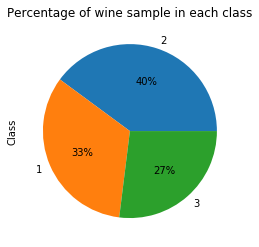

In [34]:
#Make pie chart of breakdown of wine classes in terms of percentages
df['Class'].value_counts().plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Percentage of wine sample in each class')

Text(0.5, 1.0, 'Number of wine sample in each class')

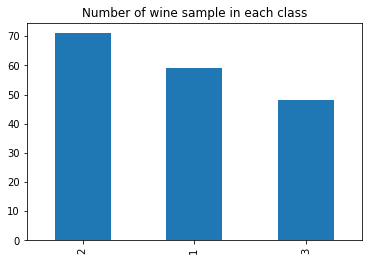

In [35]:
#Make bar chart of breakdown of wine classes in terms of totals.
df['Class'].value_counts().plot(kind = 'bar')
plt.title('Number of wine sample in each class')

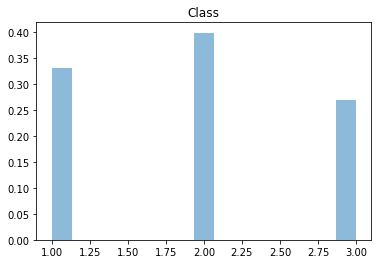

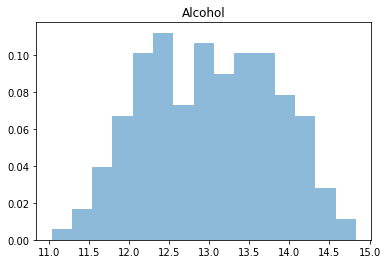

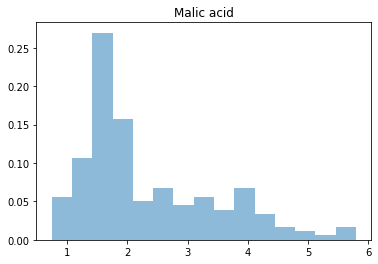

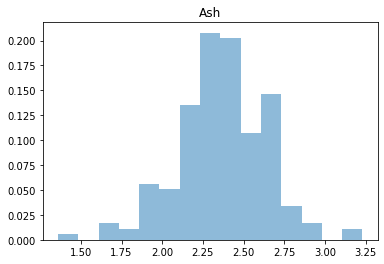

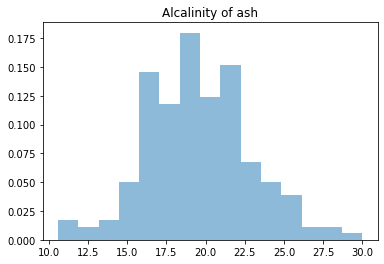

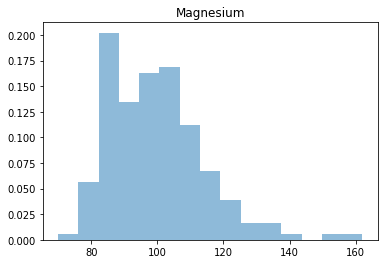

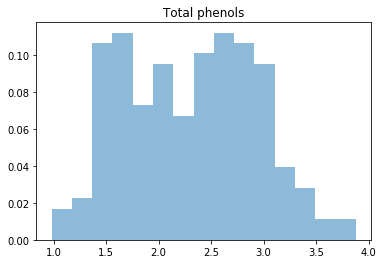

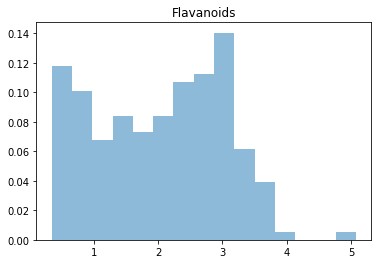

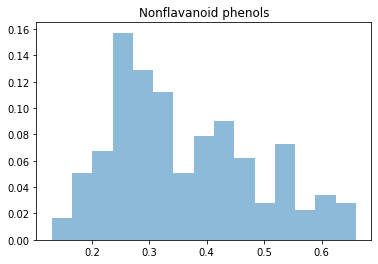

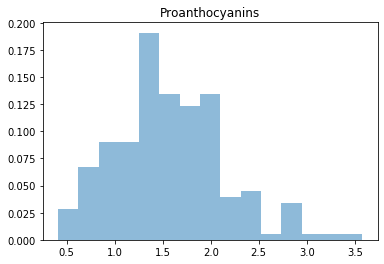

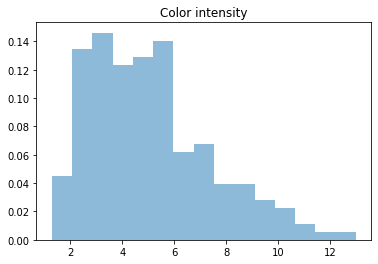

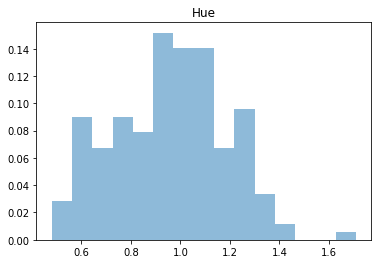

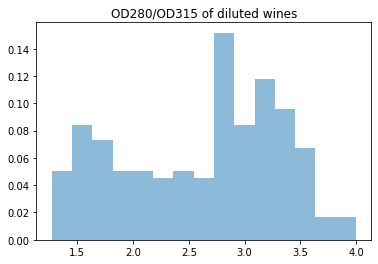

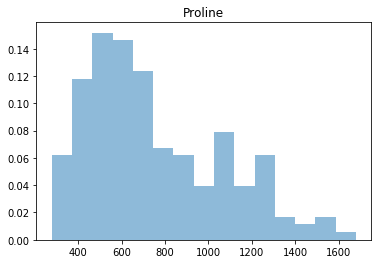

In [36]:
#Histogram of data from each feature
for columns in df.columns:
    plt.figure()
    weights =np.ones_like(df[columns])/float(len(df[columns]))
    plt.hist(df[columns],15,weights=weights,alpha=0.5)
    plt.title(columns)

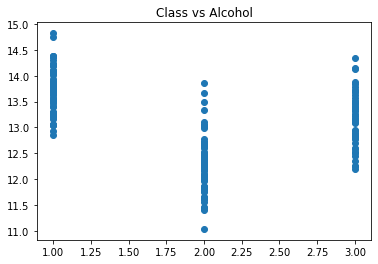

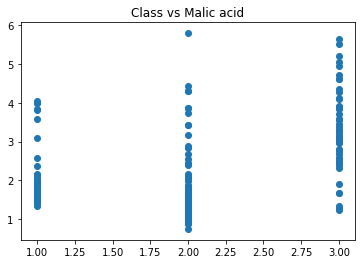

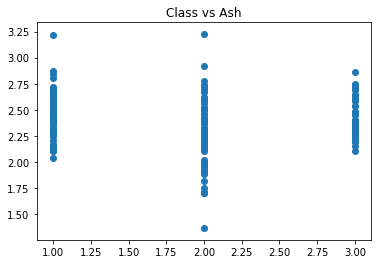

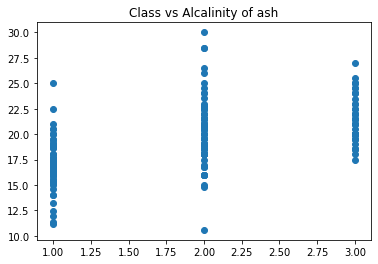

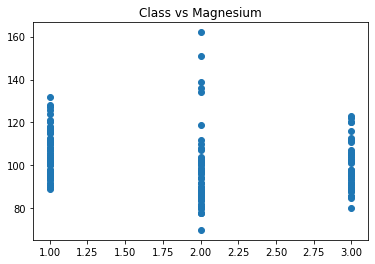

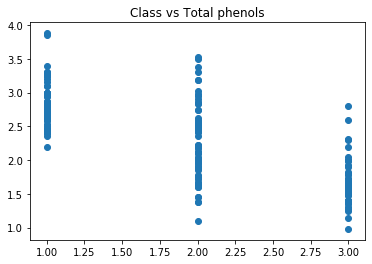

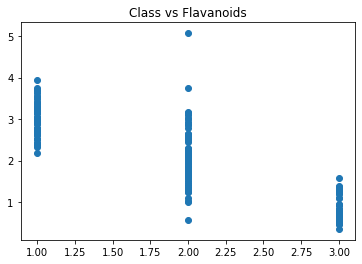

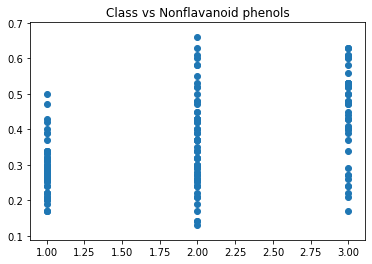

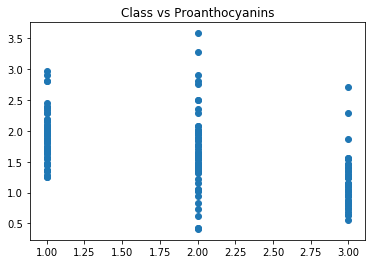

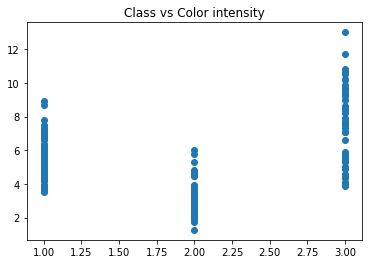

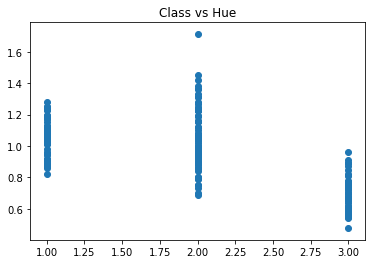

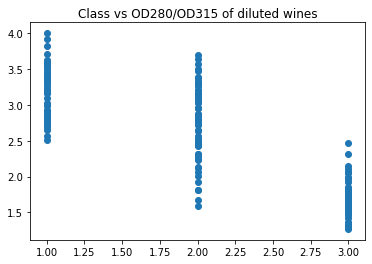

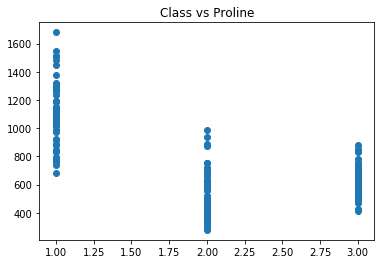

In [37]:
#Scatter plots of data from each feature
for columns in df.columns:
    if columns=='Class':
        pass
    else:
        plt.figure()
        plt.scatter(df['Class'],df[columns])
        plt.title('Class vs '+ columns)

#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

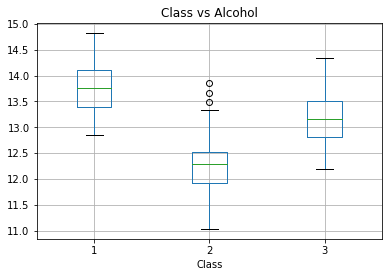

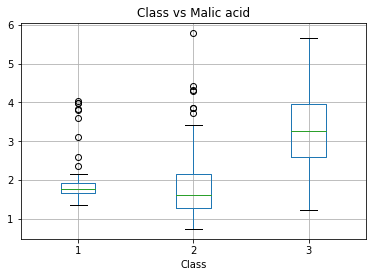

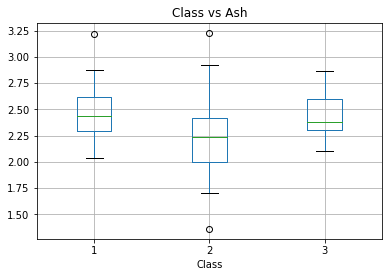

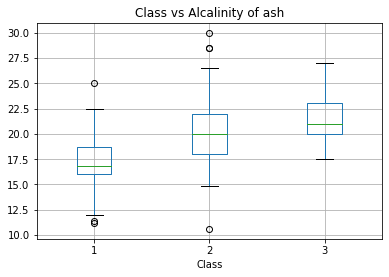

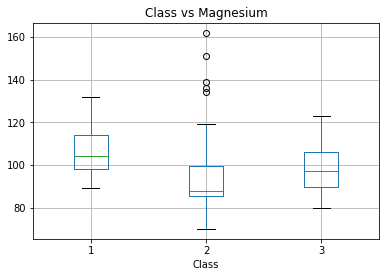

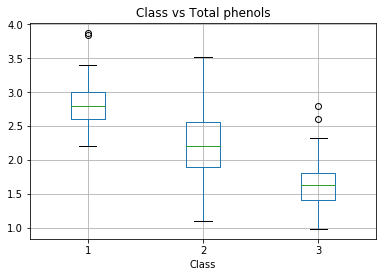

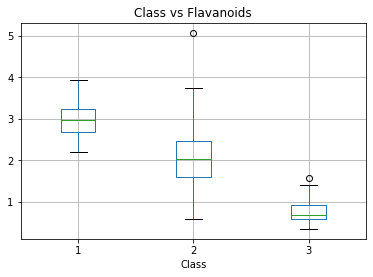

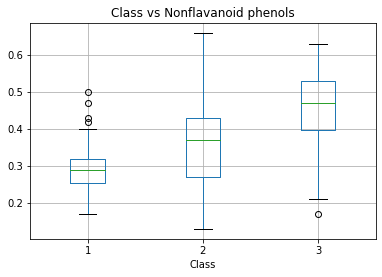

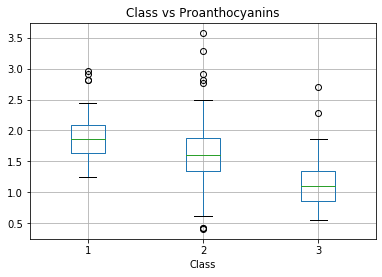

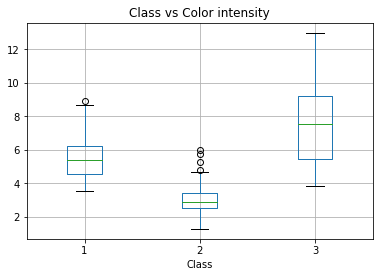

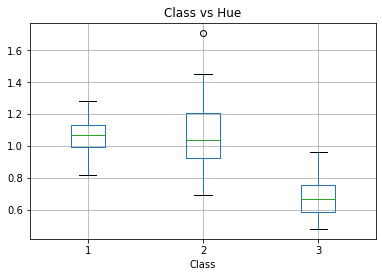

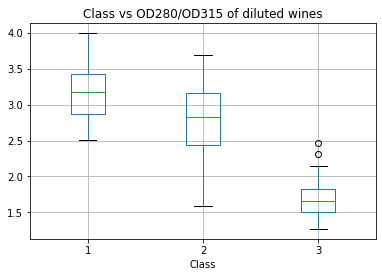

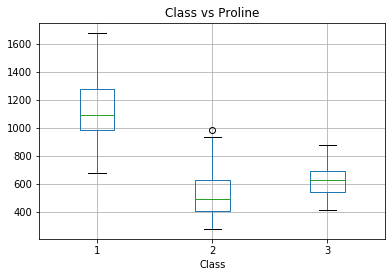

In [38]:
#Box plots of data by Class for each feature
for columns in df.columns:
    if columns=='Class':
        pass
    else:
        df.boxplot(column=columns, by='Class')
        plt.suptitle('')
        plt.title('Class vs '+ columns)
        

Yes certain features do classify wine base on this figure mainly: Total phenols, Flavanoids, Alcohol, maybe Color intensity to sperate 2 from 3 and 1, and proline to seperate 1 from 3 and 2

r^2 value is: 0.7474700456967156
Yellow is 3, Green is 2, Purple is 1


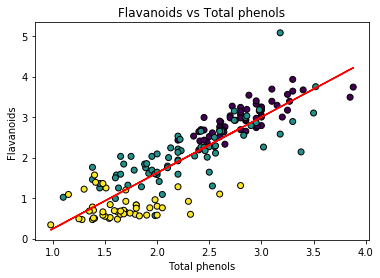

In [39]:
#Try Flavanoids and Total phenols
#scatter plot
plt.scatter(df['Total phenols'],df['Flavanoids'],c=df['Class'],edgecolors='k')
plt.xlabel('Total phenols')
plt.ylabel('Flavanoids')
plt.title('Flavanoids vs Total phenols')

#Linear regression
linModel = LinearRegression(fit_intercept=True)
x_data = df['Total phenols'][:, np.newaxis]
linModel.fit(x_data, df['Flavanoids'])
yfit = linModel.predict(x_data)

#Fitted line plot
plt.plot(df['Total phenols'],yfit,'r')

#Calculate and print correlation value
r_2=metrics.r2_score(df['Flavanoids'],yfit)
print(f'r^2 value is: {r_2}')
print('Yellow is 3, Green is 2, Purple is 1')

r^2 value is: 0.029714656954539342
Yellow is 3, Green is 2, Purple is 1


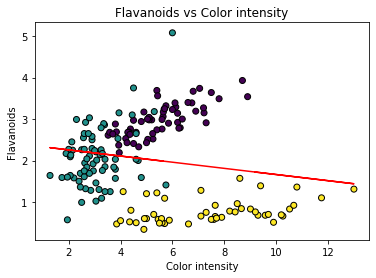

In [40]:
#Try Color intensity and Flavanoids
#scatter plot
plt.scatter(df['Color intensity'],df['Flavanoids'],c=df['Class'],edgecolors='k')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.title('Flavanoids vs Color intensity')

#Linear regression
linModel = LinearRegression(fit_intercept=True)
x_data = df['Color intensity'][:, np.newaxis]
linModel.fit(x_data, df['Flavanoids'])
yfit = linModel.predict(x_data)

#Fitted line plot
plt.plot(df['Color intensity'],yfit,'r')

#Calculate and print correlation value
r_2=metrics.r2_score(df['Flavanoids'],yfit)
print(f'r^2 value is: {r_2}')
print('Yellow is 3, Green is 2, Purple is 1')

r^2 value is: 0.05608131007644601
Yellow is 3, Green is 2, Purple is 1


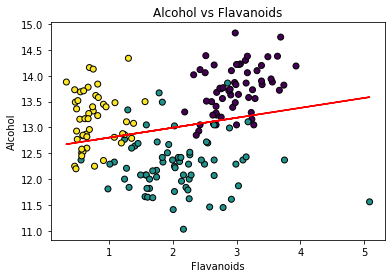

In [41]:
#Try Flavanoids and alcohol
#scatter plot
plt.scatter(df['Flavanoids'],df['Alcohol'],c=df['Class'],edgecolors='k')
plt.xlabel('Flavanoids')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Flavanoids')

#Linear regression
linModel = LinearRegression(fit_intercept=True)
x_data = df['Flavanoids'][:, np.newaxis]
linModel.fit(x_data, df['Alcohol'])
yfit = linModel.predict(x_data)

#Fitted line plot
plt.plot(df['Flavanoids'],yfit,'r')

#Calculate and print correlation value
r_2=metrics.r2_score(df['Alcohol'],yfit)
print(f'r^2 value is: {r_2}')
print('Yellow is 3, Green is 2, Purple is 1')

r^2 value is: 0.09991928122119254
Yellow is 3, Green is 2, Purple is 1


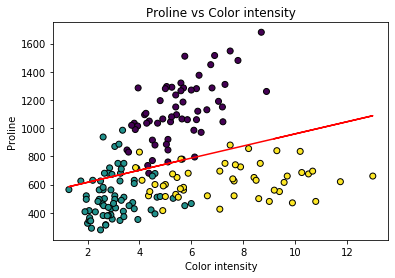

In [42]:
#Try color intensity and proline
#scatter plot
plt.scatter(df['Color intensity'],df['Proline'],c=df['Class'],edgecolors='k')
plt.xlabel('Color intensity')
plt.ylabel('Proline')
plt.title('Proline vs Color intensity')

#Linear regression
linModel = LinearRegression(fit_intercept=True)
x_data = df['Color intensity'][:, np.newaxis]
linModel.fit(x_data, df['Proline'])
yfit = linModel.predict(x_data)

#Fitted line plot
plt.plot(df['Color intensity'],yfit,'r')

#Calculate and print correlation value
r_2=metrics.r2_score(df['Proline'],yfit)
print(f'r^2 value is: {r_2}')
print('Yellow is 3, Green is 2, Purple is 1')

From scatterplot it can be seen that Flavanoid and Total Phenols has the best linear fit with an r^2 value of 0.75.

Other plots have a poor r^2 value but it can be seen from the scatter plot and grouping colour that though linear fit wasn't the best, point clustered into 3 visually distinguishable groups. 

It'd be interesting to see what type of data distribution the naive bayes classifier would be best trained with.

####  Naive Bayes Classification

In [43]:
from sklearn.naive_bayes import GaussianNB

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not eb applicable here.


In [44]:
#Split data into test and training sets with 5 factors selected for features
dTrain, dTest, cTrain, cTest = train_test_split(df[['Total phenols','Flavanoids','Alcohol','Proline','Color intensity']], df['Class'], test_size = 0.25, random_state=1)

Mean accuracy of model is 0.7555555555555555
The confusion matrix looks like following...

    1   2  3
1  16   2  0
2   5  10  2
3   0   2  8

Calssification report 
              precision    recall  f1-score   support

           1       0.76      0.89      0.82        18
           2       0.71      0.59      0.65        17
           3       0.80      0.80      0.80        10

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.75      0.76      0.75        45



Text(0.5, 1.0, 'Predicted')

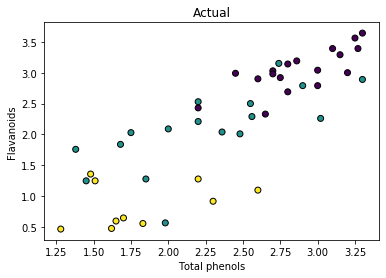

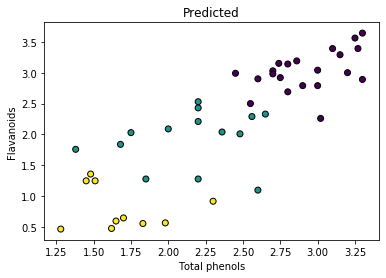

In [45]:
#Model 1: Total phenols & Flavanoids training
clf1 = GaussianNB()
clf1.fit(dTrain[['Total phenols','Flavanoids']],cTrain)

#Prediction test
y1_predict=clf1.predict(dTest[['Total phenols','Flavanoids']])
print(f"Mean accuracy of model is {metrics.accuracy_score(cTest, y1_predict)}")

#Confusion Metric
cm1=metrics.confusion_matrix(cTest, y1_predict,labels=[1, 2, 3])
cmdf1 = pd.DataFrame(cm1,index=['1', '2','3'], columns=['1','2','3'])
print("The confusion matrix looks like following...\n")
print(cmdf1)

#Classification Report
print(f"\nCalssification report \n{metrics.classification_report(cTest, y1_predict)}")      

#Graph comparison of actual class vs predicted
plt.scatter(dTest['Total phenols'],dTest['Flavanoids'],c=cTest,edgecolors='k')
plt.xlabel('Total phenols')
plt.ylabel('Flavanoids')
plt.title('Actual')
      
plt.figure()
plt.scatter(dTest['Total phenols'],dTest['Flavanoids'],c=y1_predict,edgecolors='k')
plt.xlabel('Total phenols')
plt.ylabel('Flavanoids')
plt.title('Predicted')

Mean accuracy is 0.8888888888888888
The confusion matrix looks like following...

    1   2  3
1  15   1  2
2   1  16  0
3   0   1  9

Calssification report 
              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.89      0.94      0.91        17
           3       0.82      0.90      0.86        10

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45



Text(0.5, 1.0, 'Predicted')

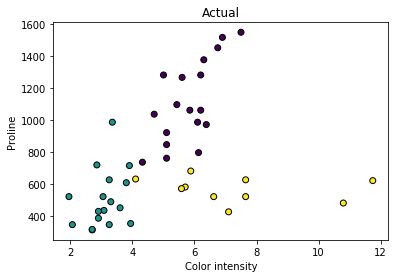

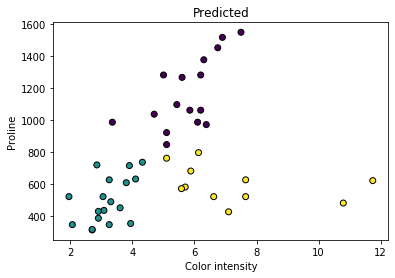

In [46]:
#Model 2: Color intensity & Proline
clf2 = GaussianNB()
clf2.fit(dTrain[['Color intensity','Proline']],cTrain)

#Prediction test
y2_predict=clf2.predict(dTest[['Color intensity','Proline']])
print(f"Mean accuracy is {metrics.accuracy_score(cTest, y2_predict)}")
      
#Confusion Metric
cm2=metrics.confusion_matrix(cTest, y2_predict,labels=[1, 2, 3])
cmdf2 = pd.DataFrame(cm2,index=['1', '2','3'], columns=['1','2','3'])
print("The confusion matrix looks like following...\n")
print(cmdf2)

#Classification Report
print(f"\nCalssification report \n{metrics.classification_report(cTest, y2_predict)}") 
      
#Graph comparison of actual class vs predicted
plt.scatter(dTest['Color intensity'],dTest['Proline'],c=cTest,edgecolors='k')
plt.xlabel('Color intensity')
plt.ylabel('Proline')
plt.title('Actual')

plt.figure()
plt.scatter(dTest['Color intensity'],dTest['Proline'],c=y2_predict,edgecolors='k')
plt.xlabel('Color intensity')
plt.ylabel('Proline')
plt.title('Predicted')

Mean accuracy is 0.9555555555555556
The confusion matrix looks like following...

    1   2  3
1  18   0  0
2   1  16  0
3   0   1  9

Calssification report 
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.94      0.94      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 1.0, 'Predicted')

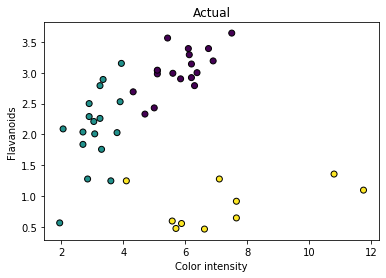

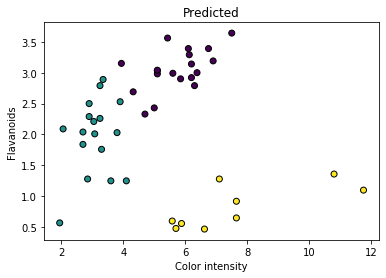

In [47]:
#Model 3: Color intensity & Flavanoids
clf3 = GaussianNB()
clf3.fit(dTrain[['Color intensity','Flavanoids']],cTrain)

#Prediction test
y3_predict=clf3.predict(dTest[['Color intensity','Flavanoids']])
print(f"Mean accuracy is {metrics.accuracy_score(cTest, y3_predict)}")

#Confusion Metric
cm3=metrics.confusion_matrix(cTest, y3_predict,labels=[1, 2, 3])
cmdf3 = pd.DataFrame(cm3,index=['1', '2','3'], columns=['1','2','3'])
print("The confusion matrix looks like following...\n")
print(cmdf3)

#Classification Report
print(f"\nCalssification report \n{metrics.classification_report(cTest, y3_predict)}") 

#Graph comparison of actual class vs predicted
plt.scatter(dTest['Color intensity'],dTest['Flavanoids'],c=cTest,edgecolors='k')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.title('Actual')

plt.figure()
plt.scatter(dTest['Color intensity'],dTest['Flavanoids'],c=y3_predict,edgecolors='k')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.title('Predicted')

Mean accuracy is 0.9333333333333333
The confusion matrix looks like following...

    1   2  3
1  18   0  0
2   1  15  1
3   0   1  9

Calssification report 
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.94      0.88      0.91        17
           3       0.90      0.90      0.90        10

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Text(0.5, 1.0, 'Predicted')

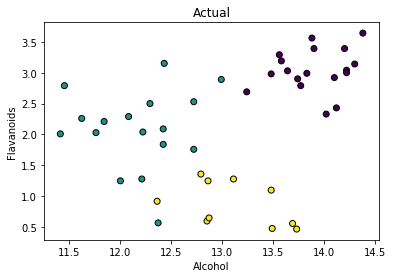

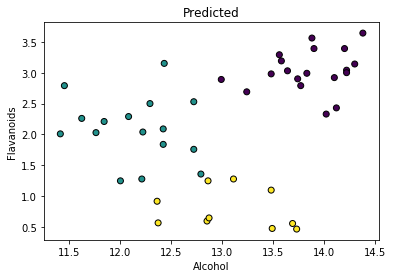

In [48]:
#Model 4: Alcohol& Flavanoids
clf4 = GaussianNB()
clf4.fit(dTrain[['Alcohol','Flavanoids']],cTrain)

#Prediction test
y4_predict=clf4.predict(dTest[['Alcohol','Flavanoids']])
print(f"Mean accuracy is {metrics.accuracy_score(cTest, y4_predict)}")

#Confusion Metric
cm4=metrics.confusion_matrix(cTest, y4_predict,labels=[1, 2, 3])
cmdf4 = pd.DataFrame(cm4,index=['1', '2','3'], columns=['1','2','3'])
print("The confusion matrix looks like following...\n")
print(cmdf4)

#Classification Report
print(f"\nCalssification report \n{metrics.classification_report(cTest, y4_predict)}") 
      
#Graph comparison of actual class vs predicted
plt.scatter(dTest['Alcohol'],dTest['Flavanoids'],c=cTest,edgecolors='k')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Actual')

plt.figure()
plt.scatter(dTest['Alcohol'],dTest['Flavanoids'],c=y4_predict,edgecolors='k')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Predicted')

From metrics, best accuracy came from the color intensity, flavanoids combination followed by the alcohol intensity, flavanoids combintaion at 96% and 93%.

Model 3 and 4 are good. Model 2 is lower in accuracy compared to Model 3 and 4 but still usable. I would not use Model 1.

Interesting to note that model with highest linear fit had the worst Beyesian model accuracy.


#### Try modeling with all 5 features

In [49]:
#Model 4: Alcohol& Flavanoids
clf5 = GaussianNB()
clf5.fit(dTrain,cTrain)

#Prediction test
y5_predict=clf5.predict(dTest)
print(f"Mean accuracy is {metrics.accuracy_score(cTest, y5_predict)}")

#Confusion Metric
cm5=metrics.confusion_matrix(cTest, y5_predict,labels=[1, 2, 3])
cmdf5 = pd.DataFrame(cm5,index=['1', '2','3'], columns=['1','2','3'])
print("The confusion matrix looks like following...\n")
print(cmdf5)

#Classification Report
print(f"\nCalssification report \n{metrics.classification_report(cTest, y5_predict)}") 

Mean accuracy is 0.9777777777777777
The confusion matrix looks like following...

    1   2   3
1  18   0   0
2   1  16   0
3   0   0  10

Calssification report 
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Using all 5 features bumped accuracy by about 2% compared to model 3. I'm don't think all 5 features were useful in the model so model training could be further optimized.